In [576]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [577]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-03-09 17:29:13,618 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:81:8D:26:04:64
2025-03-09 17:29:16,839 | INFO     |: Connected to C0:81:8D:26:04:64


In [582]:
ble.send_command(CMD.SET_KPID, "0.055|0.003|0.016")

SyntaxError: unterminated string literal (detected at line 1) (2737874796.py, line 1)

In [581]:
ble.send_command(CMD.DRIVE, "")

prop = []
time = []
motor = []
tof_arr1 = []
tof_arr2 = []
tofstamps = []
ble.send_command(CMD.START_COLLECTION, "")

2025-03-09 17:31:06,032 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [571]:
#Prompt recording data from loop
prop = []
time = []
motor = []
def pid_data_handler(uuid, bytearr):
    try:
        tofdata = ble.bytearray_to_string(bytearr)
        arr = tofdata.split("Prop:")[1] #Split messages
        prop1, arr = arr.split("Motor:")
        motor1, time1 = arr.split("Time:")
        prop.append(int(prop1))
        motor.append(int(motor1))
        time.append(int(time1))
    except Exception as e:
        print(e)


ble.start_notify(ble.uuid['RX_STRING'], pid_data_handler)


Exception: Not connected to a BLE device

In [534]:
ble.send_command(CMD.GET_PID, "")

In [561]:
#Prompt recording data from loop
tof_arr1 = []
tof_arr2 = []
tofstamps = []

def tof_data_handler(uuid, bytearr):
    try:
        tofdata = ble.bytearray_to_string(bytearr)
        arr = tofdata.split("tof1:")[1] #Split messages
        tof1, arr = arr.split("tof2:")
        tof2, time = arr.split("T:")
        tof_arr1.append(float(tof1))
        tof_arr2.append(float(tof2))
        tofstamps.append(int(time))
    except Exception as e:
        print(e)


ble.start_notify(ble.uuid['RX_STRING'], tof_data_handler)


In [562]:
ble.send_command(CMD.GET_TOF_DATA, "")

In [536]:
ble.stop_notify(ble.uuid['RX_STRING'],)

[40316, 40325, 40340, 40356, 40378, 40396, 40411, 40425, 40446, 40466, 40495, 40513, 40533, 40550, 40570, 40598, 40616, 40636, 40659, 40683, 40699, 40719, 40739, 40758, 40778, 40795, 40813, 40837, 40850, 40858, 40873, 40886, 40907, 40916, 40929, 40943, 40963, 40981, 40991, 41007, 41017, 41029, 41045, 41062, 41082, 41110, 41126, 41148, 41165, 41176, 41189, 41202, 41212, 41223, 41236, 41254, 41274, 41291, 41302, 41309, 41335, 41351, 41368, 41386, 41400, 41416, 41428, 41442, 41460, 41480, 41498, 41518, 41537, 41557, 41575, 41592, 41602, 41609, 41618, 41628, 41641, 41655, 41664, 41684, 41703, 41721, 41740, 41750, 41767, 41772, 41777, 41803, 41813, 41823, 41834, 41843, 41852, 41871, 41888, 41903, 41920, 41929, 41947, 41955, 41964, 41975, 41985, 41990, 41994, 42013, 42023, 42039, 42049, 42056, 42074, 42093, 42103, 42113, 42123, 42132, 42143, 42153, 42160, 42170, 42174, 42191, 42200, 42211, 42219]


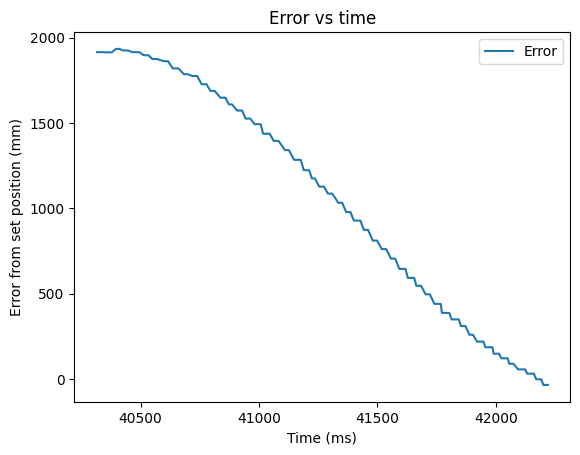

In [535]:
import matplotlib.pyplot as plt12
from matplotlib.pyplot import locator_params
import numpy as np

print(time)

plt.plot(time, prop)


plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Error"], loc="upper right")
plt.title('Error vs time')
plt.ylabel('Error from set position (mm)')
plt.xlabel('Time (ms)')
plt.show()

12 MS for pid loop
30-40 MS for TOF reading


[17014, 17031, 17042, 17064, 17074, 17090, 17114, 17127, 17148, 17159, 17170, 17185, 17193, 17215, 17231, 17250, 17261, 17276, 17291, 17298, 17320, 17338, 17356, 17373, 17393, 17409, 17428, 17446, 17472, 17487, 17511, 17524, 17543, 17556, 17568, 17583, 17598, 17611, 17628, 17639, 17663, 17682, 17699, 17720, 17743, 17759, 17778, 17803, 17821, 17842, 17860, 17880, 17900, 17917, 17935, 17946, 17967, 17993, 18013, 18026, 18039, 18056, 18066, 18077, 18091, 18101, 18115, 18136, 18159, 18172, 18184, 18195, 18211, 18222, 18238, 18252, 18265, 18277, 18299, 18316, 18335, 18348, 18352, 18356, 18365, 18378, 18392, 18403, 18416, 18424, 18434, 18449, 18454, 18469, 18473, 18485, 18503, 18512, 18521, 18531, 18537, 18556, 18566, 18591, 18613, 18623, 18640, 18649, 18658, 18671, 18685, 18695, 18717, 18733, 18748, 18757, 18767, 18775, 18779, 18796, 18807, 18823, 18832, 18846, 18859, 18873, 18881, 18896]


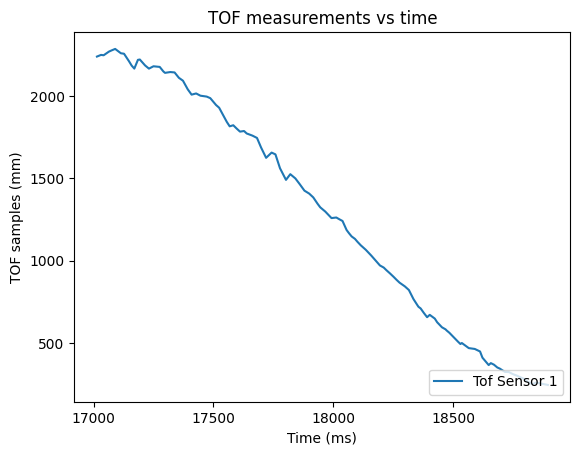

In [565]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np

print(tofstamps)

plt.plot(tofstamps, tof_arr1)

plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Tof Sensor 1", "Tof Sensor 2"], loc="lower right")
plt.title('TOF measurements vs time')
plt.ylabel('TOF samples (mm)')
plt.xlabel('Time (ms)')
plt.show()

[129276, 129320, 129353, 129397, 129437, 129476, 129507, 129545, 129588, 129621, 129659, 129690, 129730, 129762, 129796, 129827, 129868, 129908, 129937, 129976, 130014, 130055, 130097, 130134, 130172, 130211, 130244, 130276, 130321, 130362, 130403, 130433, 130463, 130505, 130540, 130583, 130615, 130660, 130701, 130742, 130783, 130817, 130851, 130894, 130933, 130967, 131002, 131041, 131077, 131111, 131150, 131191, 131232, 131274, 131308, 131347, 131388, 131429, 131471, 131507, 131548, 131589, 131629, 131667, 131701, 131739, 131778, 131819, 131851, 131889, 131924, 131956, 131992, 132024, 132068, 132099, 132138, 132179, 132220, 132262, 132294, 132335, 132374, 132413, 132454, 132485, 132522, 132556, 132592, 132625, 132659, 132694, 132726, 132761, 132795, 132831, 132868, 132900, 132936, 132969, 133003, 133037, 133070, 133103, 133140, 133173, 133206, 133239, 133273, 133312, 133343, 133377, 133411, 133447, 133480, 133514, 133547, 133585, 133621, 133659, 133691, 133729, 133762, 133795, 133834,

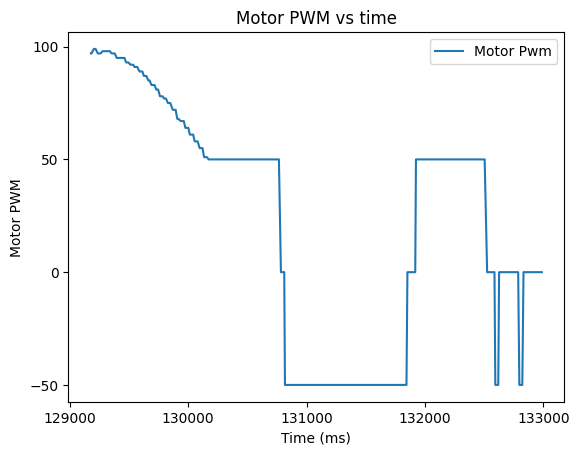

2025-03-09 16:43:27,342 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [478]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np

print(tofstamps)

plt.plot(time, motor)


plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Motor Pwm"], loc="upper right")
plt.title('Motor PWM vs time')
plt.ylabel('Motor PWM')
plt.xlabel('Time (ms)')
plt.show()

## IMU Accelerometer data retrieval

In [19]:
#Prompt recording data from loop
acc_roll = []
acc_pitch = []
filt_roll = []
filt_pitch = []
gy_roll = []
gy_pitch = []
gy_yaw = []
comp_pitch = []
comp_roll = []
timestamps = []

def imu_data_handler(uuid, bytearr):
    try:
        imudata = ble.bytearray_to_string(bytearr)
        arr = imudata.split("pitch:")[1] #Split messages
        apitch, arr = arr.split("roll:")
        aroll, arr = arr.split("filtp:")
        filtp, arr = arr.split("filtr:")
        filtr, arr = arr.split("gp:")
        gyp, arr = arr.split("gr:")
        gyr, arr = arr.split("gy:")
        gyy, arr = arr.split("cp:")
        cp, arr = arr.split("cr:")
        cr, time = arr.split("T:")
        acc_pitch.append(float(apitch))
        acc_roll.append(float(aroll))
        filt_pitch.append(float(filtp))
        filt_roll.append(float(filtr))
        gy_pitch.append(float(gyp))
        gy_roll.append(float(gyr))
        gy_yaw.append(float(gyy))
        comp_pitch.append(float(cp))
        comp_roll.append(float(cr))
        timestamps.append(int(time))
    except Exception as e:
        print(e)


ble.start_notify(ble.uuid['RX_STRING'], imu_data_handler)


In [20]:
ble.send_command(CMD.GET_IMU_DATA, "")

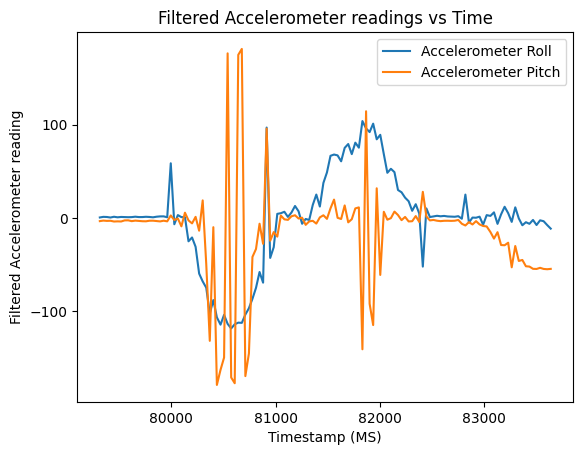

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
plt.plot(timestamps, acc_roll)
plt.plot(timestamps, acc_pitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Accelerometer Roll", "Accelerometer Pitch"], loc="upper right")
plt.title('Filtered Accelerometer readings vs Time')
plt.ylabel('Filtered Accelerometer reading')
plt.xlabel('Timestamp (MS)')
plt.show()

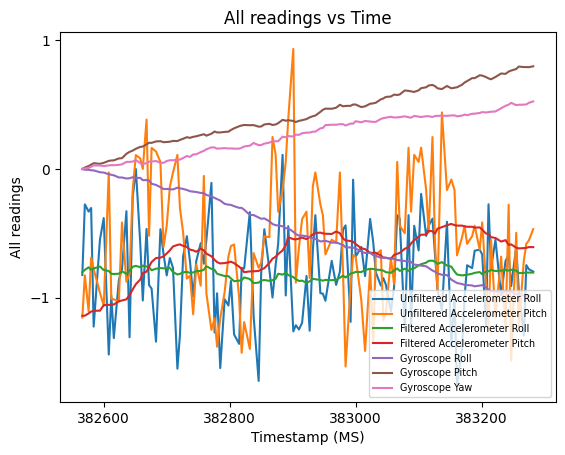

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
plt.plot(timestamps, acc_roll)
plt.plot(timestamps, acc_pitch)
plt.plot(timestamps, filt_roll)
plt.plot(timestamps, filt_pitch)
plt.plot(timestamps, gy_roll)
plt.plot(timestamps, gy_pitch)
plt.plot(timestamps, gy_yaw)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Unfiltered Accelerometer Roll", "Unfiltered Accelerometer Pitch", "Filtered Accelerometer Roll", "Filtered Accelerometer Pitch", "Gyroscope Roll", "Gyroscope Pitch", "Gyroscope Yaw"], loc="lower right", fontsize='x-small')
plt.title('All readings vs Time')
plt.ylabel('All readings')
plt.xlabel('Timestamp (MS)')
plt.show()

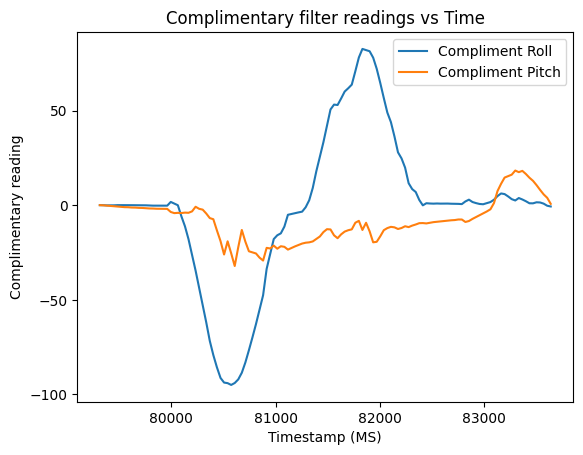

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
plt.plot(timestamps, comp_roll)
plt.plot(timestamps, comp_pitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Compliment Roll", "Compliment Pitch"], loc="upper right")
plt.title('Complimentary filter readings vs Time')
plt.ylabel('Complimentary reading')
plt.xlabel('Timestamp (MS)')
plt.show()

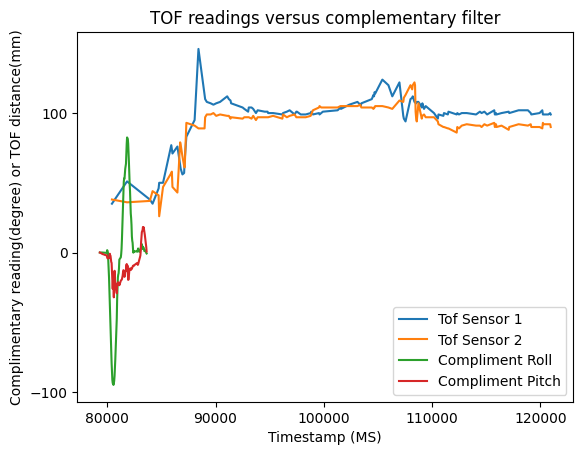

2025-02-24 17:44:20,363 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [24]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np

plt.plot(tofstamps, tof_arr1)
plt.plot(tofstamps, tof_arr2)
plt.plot(timestamps, comp_roll)
plt.plot(timestamps, comp_pitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Tof Sensor 1", "Tof Sensor 2","Compliment Roll", "Compliment Pitch"], loc="lower right")
plt.title('TOF readings versus complementary filter')
plt.ylabel('Complimentary reading(degree) or TOF distance(mm)')
plt.xlabel('Timestamp (MS)')
plt.show()

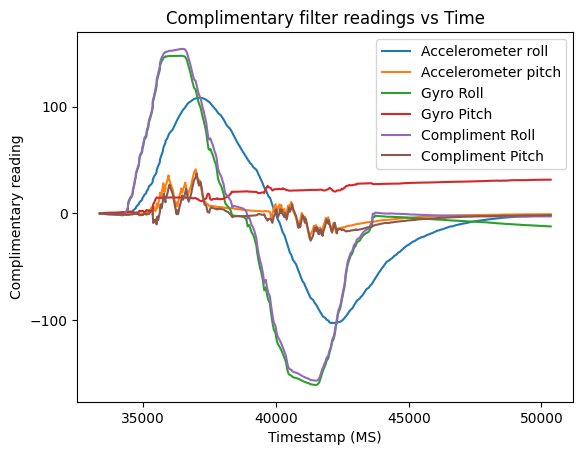

2025-02-10 14:44:03,486 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76


In [72]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params
import numpy as np
plt.plot(timestamps, filt_roll)
plt.plot(timestamps, filt_pitch)
plt.plot(timestamps, gy_roll)
plt.plot(timestamps, gy_pitch)
plt.plot(timestamps, comp_roll)
plt.plot(timestamps, comp_pitch)
plt.locator_params(axis='x', nbins=5) 
plt.locator_params(axis='y', nbins=5) 
plt.legend(["Accelerometer roll", "Accelerometer pitch", "Gyro Roll", "Gyro Pitch", "Compliment Roll", "Compliment Pitch"], loc="upper right")
plt.title('Complimentary filter readings vs Time')
plt.ylabel('Complimentary reading')
plt.xlabel('Timestamp (MS)')
plt.show()

In [18]:
ble.disconnect()

2025-03-07 15:06:46,529 | INFO     |: Disconnected from 1EFFEDB9-73BA-9396-D724-47E443C12C76
